<a href="https://colab.research.google.com/github/sujith-kumara/Unsupervised_LULC_change_detection_karaikal/blob/main/thiruvettakudy_remote_sensing_latex_ss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install earthengine-api

In [ ]:
!pip install earthengine-api folium eemont


In [ ]:
# Import necessary libraries
import ee
import folium

# Authenticate and initialize Earth Engine
try:
  ee.Initialize(project = 'ee-sujithkumara1729')
except Exception as e:
  ee.Authenticate()
  ee.Initialize(project = 'ee-sujithkumara1729')

In [ ]:
def add_ee_layer(image, vis_params, name, opacity=1.0):
    map_id_dict = image.getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True,
        opacity=opacity
    ).add_to(Map)

#CVI-OTSU

In [ ]:
import ee
import folium
import numpy as np
from skimage.filters import threshold_otsu

# Authenticate to the Earth Engine servers
# ee.Authenticate()
# ee.Initialize()

# Define the region of interest (ROI) for Thiruvetakudy, India
roi = ee.Geometry.Rectangle([79.83516, 10.97711, 79.85407, 10.99099])

# Load Landsat pre-change image
pre_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2010-01-01', '2015-01-01') \
    .median()

# Load Landsat post-change image
post_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2015-01-01', '2022-01-01') \
    .median()

# Compute the spectral change vectors
spectral_change_vectors = post_change.subtract(pre_change)

# Compute the magnitude image
magnitude_image = spectral_change_vectors.pow(2).reduce('sum').sqrt()

# Flatten and extract CVI magnitudes within the ROI
cvi_magnitudes = magnitude_image.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('sum').getInfo()

# Convert CVI magnitudes to a NumPy array
cvi_magnitudes_array = np.array(cvi_magnitudes)

# Calculate threshold using Otsu's method
thresh = threshold_otsu(cvi_magnitudes_array)

# Apply threshold to obtain the change detection map
change_detection_map = magnitude_image.gt(thresh)

# Clip the change detection map to the defined ROI
change_detection_map = change_detection_map.clip(roi)


Map = folium.Map(location=[(10.982725827709004 + 10.995625530440345) / 2, (79.8361122109064 + 79.85016698614444) / 2], zoom_start=15)

# Add the change detection map to the map with appropriate visualization parameters
add_ee_layer(change_detection_map.updateMask(change_detection_map),
             {'palette': 'red'},  # Adjust palette as needed
             'Change Detection Map')

# Display the map
Map.add_child(folium.LayerControl())
Map


#CVI

In [ ]:
import ee
import folium
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

# Authenticate to the Earth Engine servers
# ee.Authenticate()
# ee.Initialize()

# Define the region of interest (ROI) for Thiruvetakudy, India
roi = ee.Geometry.Rectangle([79.83516, 10.97711, 79.85407, 10.99099])

# Load Landsat pre-change image
pre_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2010-01-01', '2015-01-01') \
    .median()

# Load Landsat post-change image
post_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2015-01-01', '2022-01-01') \
    .median()

# Compute the spectral change vectors
spectral_change_vectors = post_change.subtract(pre_change)

# Compute the magnitude image
magnitude_image = spectral_change_vectors.pow(2).reduce('sum').sqrt()
# Flatten and extract CVI magnitudes within the ROI
cvi_magnitudes = magnitude_image.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('sum').getInfo()  # Replace 'result' with the appropriate band or property name
mean_cvi_magnitude = np.mean(cvi_magnitudes)
std_dev_cvi_magnitude = np.std(cvi_magnitudes)
# Set a threshold value (you may need to adjust this based on your data)
threshold_value = mean_cvi_magnitude + 2 * std_dev_cvi_magnitude

# Apply threshold to obtain the change detection map
change_detection_map = magnitude_image.gt(threshold_value)

# Clip the change detection map to the defined ROI
change_detection_map = change_detection_map.clip(roi)


Map = folium.Map(location=[(10.982725827709004 + 10.995625530440345) / 2, (79.8361122109064 + 79.85016698614444) / 2], zoom_start=15)

# Add Landsat pre-change and post-change images to the map
#add_ee_layer(pre_change, {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000, 'gamma': 1.4}, 'Pre-Change Image')
#add_ee_layer(post_change, {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000, 'gamma': 1.4}, 'Post-Change Image')

# Add spectral change vectors to the map
#add_ee_layer(spectral_change_vectors, {'bands': ['B4', 'B3', 'B2'], 'min': -500, 'max': 500, 'gamma': 1.4}, 'Spectral Change Vectors')

# Add the change detection map to the map
add_ee_layer(change_detection_map.updateMask(change_detection_map), {'palette': 'FF0000'}, 'Change Detection Map')

# Display the map
Map.add_child(folium.LayerControl())
Map

426.92687166750886
206.09198110966423


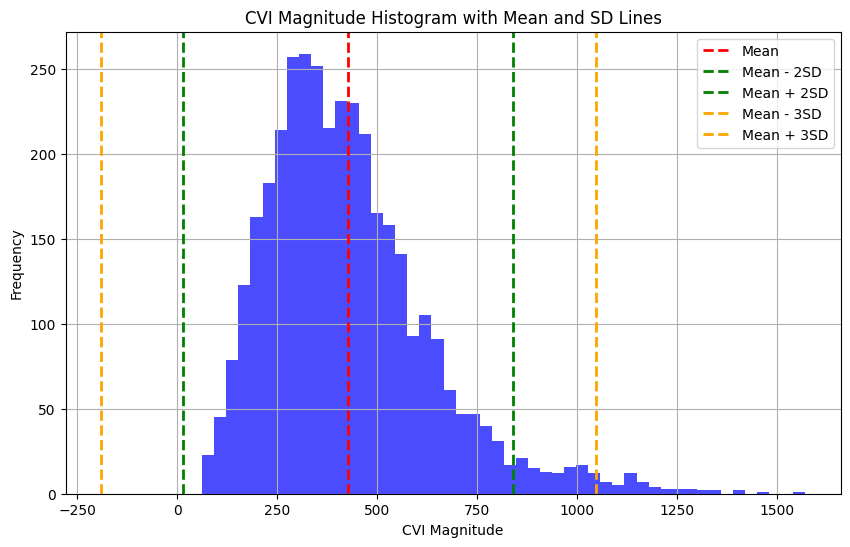

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten and extract CVI magnitudes within the ROI
cvi_magnitudes = magnitude_image.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('sum').getInfo()  # Replace 'result' with the appropriate band or property name

# Calculate mean and standard deviation
mean_cvi_magnitude = np.mean(cvi_magnitudes)
std_dev_cvi_magnitude = np.std(cvi_magnitudes)
print(mean_cvi_magnitude)
print(std_dev_cvi_magnitude)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(np.array(cvi_magnitudes), bins=50, color='blue', alpha=0.7)

# Plot lines for mean, mean ± 2 SD, and mean ± 3 SD
plt.axvline(mean_cvi_magnitude, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_cvi_magnitude - 2 * std_dev_cvi_magnitude, color='green', linestyle='dashed', linewidth=2, label='Mean - 2SD')
plt.axvline(mean_cvi_magnitude + 2 * std_dev_cvi_magnitude, color='green', linestyle='dashed', linewidth=2, label='Mean + 2SD')
plt.axvline(mean_cvi_magnitude - 3 * std_dev_cvi_magnitude, color='orange', linestyle='dashed', linewidth=2, label='Mean - 3SD')
plt.axvline(mean_cvi_magnitude + 3 * std_dev_cvi_magnitude, color='orange', linestyle='dashed', linewidth=2, label='Mean + 3SD')

# Set plot parameters
plt.title('CVI Magnitude Histogram with Mean and SD Lines')
plt.xlabel('CVI Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Save the plot as an image file
plt.savefig('cvi_histogram_thiruvettakudy.png')

# Show the plot
plt.show()


In [ ]:
# Create a binary mask where changed pixels are set to 1 and unchanged pixels are set to 0
binary_mask = change_detection_map.eq(1)

# Calculate the total number of pixels in the ROI
total_pixels = roi.area()

# Calculate the number of changed pixels in the ROI
changed_pixels = binary_mask.reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=roi,
    scale=30
)

# Extract the count of changed pixels from the result
changed_pixel_count = ee.Number(changed_pixels.values().get(0))

# Calculate the percentage of changed pixels
percentage_changed_pixels = changed_pixel_count.divide(total_pixels).multiply(100)

# Print the percentage of changed pixels
print('Percentage of changed pixels:', percentage_changed_pixels.getInfo())


Percentage of changed pixels: 0.01547873521588709


#NDVI

In [ ]:
# Define the region of interest (ROI) for Thiruvetakudy, India
roi = ee.Geometry.Rectangle([79.83516, 10.97711, 79.85407, 10.99099])

# Load Landsat pre-change image
pre_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2010-01-01', '2015-01-01') \
    .median()

# Load Landsat post-change image
post_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2015-01-01', '2022-01-01') \
    .median()
# Calculate NDVI for pre and post-change images
ndvi_pre = pre_change.normalizedDifference(['B5', 'B4'])
ndvi_post = post_change.normalizedDifference(['B5', 'B4'])

# Compute the difference between NDVI images for SICA
ndvi_difference_sica = ndvi_post.subtract(ndvi_pre)

# Clip NDVI difference to the ROI
ndvi_difference_sica = ndvi_difference_sica.clip(roi)

In [ ]:
import numpy as np
# Assuming ndvi_difference is your Earth Engine image
ndvi_difference_values = ndvi_difference_sica.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('nd').getInfo()

# Convert to NumPy array
ndvi_difference_array = np.array(ndvi_difference_values)

# Print the NumPy array
print(ndvi_difference_array)

[-0.01213192  0.00553968  0.00553968 ...  0.10239734  0.02629659
  0.02098028]


In [ ]:
# Convert NumPy array to list
ndvi_difference_list = ndvi_difference_array.tolist()

# Convert list to Earth Engine Image
ee_image = ee.Image.constant(ndvi_difference_list)

# Print Earth Engine Image information
print(ee_image.getInfo())

{'type': 'Image', 'bands': [{'id': 'constant_0', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.012131916359066963, 'max': -0.012131916359066963}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'constant_1', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': 0.005539680831134319, 'max': 0.005539680831134319}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'constant_2', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': 0.005539680831134319, 'max': 0.005539680831134319}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'constant_3', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': 0.0757519081234932, 'max': 0.0757519081234932}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'constant_4', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': 0.12743708491325378, 'max': 0.12743708491325378}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0

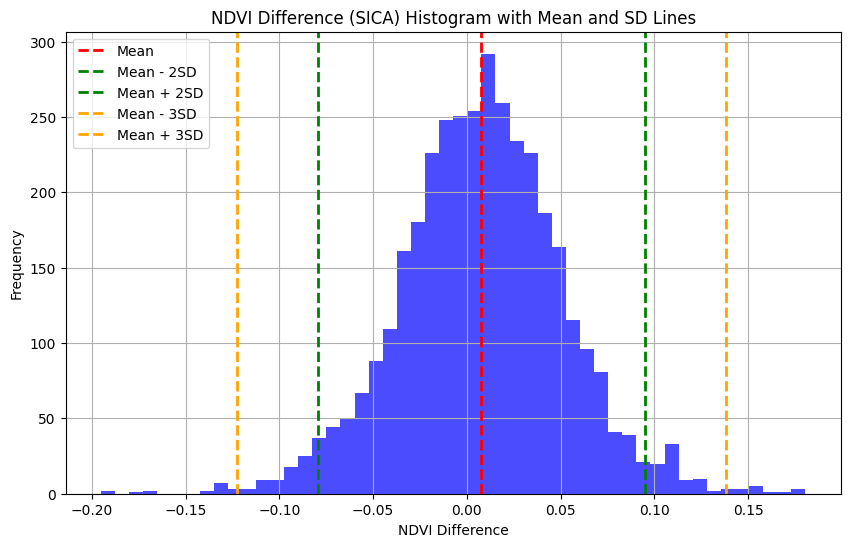

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten and extract NDVI difference values within the ROI
ndvi_difference_values = ndvi_difference_sica.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('nd').getInfo()

# Calculate mean and standard deviation
mean_ndvi_difference = np.mean(ndvi_difference_values)
std_dev_ndvi_difference = np.std(ndvi_difference_values)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(np.array(ndvi_difference_values), bins=50, color='blue', alpha=0.7)

# Plot lines for mean, mean ± 2 SD, and mean ± 3 SD
plt.axvline(mean_ndvi_difference, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_ndvi_difference - 2 * std_dev_ndvi_difference, color='green', linestyle='dashed', linewidth=2, label='Mean - 2SD')
plt.axvline(mean_ndvi_difference + 2 * std_dev_ndvi_difference, color='green', linestyle='dashed', linewidth=2, label='Mean + 2SD')
plt.axvline(mean_ndvi_difference - 3 * std_dev_ndvi_difference, color='orange', linestyle='dashed', linewidth=2, label='Mean - 3SD')
plt.axvline(mean_ndvi_difference + 3 * std_dev_ndvi_difference, color='orange', linestyle='dashed', linewidth=2, label='Mean + 3SD')

# Set plot parameters
plt.title('NDVI Difference (SICA) Histogram with Mean and SD Lines')
plt.xlabel('NDVI Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Save the histogram as a PNG file
plt.savefig('ndvi_difference_histogram.png')

# Show the plot
plt.show()


In [ ]:
# Visualization parameters for NDVI difference (SICA)
ndvi_diff_vis_params_sica = {
    'min': mean_ndvi_difference - 2 * std_dev_ndvi_difference,
    'max': mean_ndvi_difference + 2 * std_dev_ndvi_difference,
    'palette': ['red', 'white', 'green']
}
# Create a folium map centered on the ROI
Map = folium.Map(location=[10.9836, 79.8426], zoom_start=14)  # Centered on the given ROI
add_ee_layer(ndvi_difference_sica, ndvi_diff_vis_params_sica, 'NDVI Difference (SICA)')
# Display the map
Map.add_child(folium.LayerControl())

In [ ]:
# Flatten and extract NDVI difference values within the ROI
ndvi_diff_values = ndvi_difference_sica.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('nd').getInfo()

# Convert the list of values to a NumPy array
ndvi_diff_array = np.array(ndvi_diff_values)

# Count the number of pixels in each color category
red_pixels = np.sum((ndvi_diff_array < mean_ndvi_difference - 2 * std_dev_ndvi_difference))
white_pixels = np.sum((ndvi_diff_array >= mean_ndvi_difference - 2 * std_dev_ndvi_difference) & (ndvi_diff_array <= mean_ndvi_difference + 2 * std_dev_ndvi_difference))
green_pixels = np.sum((ndvi_diff_array > mean_ndvi_difference + 2 * std_dev_ndvi_difference))

# Calculate the total number of pixels
total_pixels = red_pixels + white_pixels + green_pixels

# Calculate the percentage of each color category
percentage_red = (red_pixels / total_pixels) * 100
percentage_white = (white_pixels / total_pixels) * 100
percentage_green = (green_pixels / total_pixels) * 100

# Print the results
print(f'Percentage of Red pixels: {percentage_red:.2f}%')
print(f'Percentage of White pixels: {percentage_white:.2f}%')
print(f'Percentage of Green pixels: {percentage_green:.2f}%')

Percentage of Red pixels: 2.64%
Percentage of White pixels: 94.73%
Percentage of Green pixels: 2.64%


In [ ]:
# Set the output file path on Google Drive
output_file_path = 'Thiruvettakudy/latex/NDVI/ndvi_difference_sica'

# Export the change mask to Google Drive
task = ee.batch.Export.image.toDrive(
    image=ndvi_difference_sica,
    description='NDVI_Difference_SICA',
    folder=output_file_path,
    scale=1,  # Adjust scale based on your requirements
    region=roi.getInfo()['coordinates'],
)

# Start the export task
task.start()

# Wait for the task to complete (you can also monitor the task on the Earth Engine Console)
import time

while task.status()['state'] in ['READY', 'RUNNING']:
    print('Exporting...')
    time.sleep(10)  # Wait for 10 seconds

print('Export completed:', task.status())


Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Exporting...
Export completed: {'state': 'COMPLETED', 'description': 'NDVI_Difference_SICA', 'priority': 100, 'creation_timestamp_ms': 1710388728535, 'update_timestamp_ms': 1710389011123, 'start_timestamp_ms': 1710388734375, 'task_type': 'EXPORT_IMAGE', 'destination_uris': ['https://drive.google.com/#folders/1QLaMGVWmT8qRTB3NfQNnX-eAIOa2U3Q8'], 'attempt': 1, 'batch_eecu_usage_seconds': 1082.225830078125, 'id': 'MIUUOWIUYL74Q5TZ4XYBOGVN', 'name': 'projects/ee-sujithkumara1729/operations/MIUUOWIUYL74Q5TZ4XYBOGVN'}


#NDMI

In [ ]:
# Define the region of interest (ROI) for Thiruvetakudy, India
roi = ee.Geometry.Rectangle([79.83516, 10.97711, 79.85407, 10.99099])

# Load Landsat pre-change image
pre_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2010-01-01', '2015-01-01') \
    .median()

# Load Landsat post-change image
post_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2015-01-01', '2022-01-01') \
    .median()
# Calculate NDMI for pre and post-change images
ndmi_pre = pre_change.normalizedDifference(['B5', 'B6'])  # NIR - SWIR
ndmi_post = post_change.normalizedDifference(['B5', 'B6'])  # NIR - SWIR

# Compute the difference between NDMI images for SICA
ndmi_difference_sica = ndmi_post.subtract(ndmi_pre)

# Clip NDMI difference to the ROI
ndmi_difference_sica = ndmi_difference_sica.clip(roi)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten and extract NDMI difference values within the ROI
ndmi_difference_values = ndmi_difference_sica.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('nd').getInfo()

# Calculate mean and standard deviation
mean_ndmi_difference = np.mean(ndmi_difference_values)
std_dev_ndmi_difference = np.std(ndmi_difference_values)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(np.array(ndmi_difference_values), bins=50, color='blue', alpha=0.7)

# Plot lines for mean, mean ± 2 SD, and mean ± 3 SD
plt.axvline(mean_ndmi_difference, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_ndmi_difference - 2 * std_dev_ndmi_difference, color='green', linestyle='dashed', linewidth=2, label='Mean - 2SD')
plt.axvline(mean_ndmi_difference + 2 * std_dev_ndmi_difference, color='green', linestyle='dashed', linewidth=2, label='Mean + 2SD')
plt.axvline(mean_ndmi_difference - 3 * std_dev_ndmi_difference, color='orange', linestyle='dashed', linewidth=2, label='Mean - 3SD')
plt.axvline(mean_ndmi_difference + 3 * std_dev_ndmi_difference, color='orange', linestyle='dashed', linewidth=2, label='Mean + 3SD')

# Set plot parameters
plt.title('NDMI Difference (SICA) Histogram with Mean and SD Lines')
plt.xlabel('NDMI Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Save the histogram as a PNG file
plt.savefig('thiruvettakudy_ndmi_difference_histogram.png')

# Show the plot
plt.show()


In [ ]:
ndmi_diff_vis_params_sica = {
    'min': mean_ndmi_difference - 2 * std_dev_ndmi_difference,
    'max': mean_ndmi_difference + 2 * std_dev_ndmi_difference,
    'palette': ['red', 'white', 'green']
}
add_ee_layer(ndmi_difference_sica, ndvi_diff_vis_params_sica, 'NDVI Difference (SICA)')
# Display the map
Map.add_child(folium.LayerControl())

In [ ]:
# Flatten and extract NDMI difference values within the ROI
ndmi_diff_values = ndmi_difference_sica.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('nd').getInfo()

# Convert the list of values to a NumPy array
ndmi_diff_array = np.array(ndmi_diff_values)

# Count the number of pixels in each color category
red_pixels = np.sum((ndmi_diff_array < mean_ndmi_difference - 2 * std_dev_ndmi_difference))
white_pixels = np.sum((ndmi_diff_array >= mean_ndmi_difference - 2 * std_dev_ndmi_difference) & (ndmi_diff_array <= mean_ndmi_difference + 2 * std_dev_ndmi_difference))
green_pixels = np.sum((ndmi_diff_array > mean_ndmi_difference + 2 * std_dev_ndmi_difference))

# Calculate the total number of pixels
total_pixels = red_pixels + white_pixels + green_pixels

# Calculate the percentage of each color category
percentage_red = (red_pixels / total_pixels) * 100
percentage_white = (white_pixels / total_pixels) * 100
percentage_green = (green_pixels / total_pixels) * 100

# Print the results
print(f'Percentage of Red pixels: {percentage_red:.2f}%')
print(f'Percentage of White pixels: {percentage_white:.2f}%')
print(f'Percentage of Green pixels: {percentage_green:.2f}%')


#NDBI

In [ ]:
# Define the region of interest (ROI) for Thiruvetakudy, India
roi = ee.Geometry.Rectangle([79.83516, 10.97711, 79.85407, 10.99099])

# Load Landsat pre-change image
pre_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2010-01-01', '2015-01-01') \
    .median()

# Load Landsat post-change image
post_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2015-01-01', '2022-01-01') \
    .median()

# Calculate NDBI for pre and post-change images
ndbi_pre = pre_change.normalizedDifference(['B5', 'B6'])  # NIR - SWIR1
ndbi_post = post_change.normalizedDifference(['B5', 'B6'])

# Compute the difference between NDBI images for change detection
ndbi_difference = ndbi_post.subtract(ndbi_pre)

# Clip NDBI difference to the ROI
ndbi_difference = ndbi_difference.clip(roi)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten and extract NDBI difference values within the ROI
ndbi_diff_values = ndbi_difference.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('nd').getInfo()

# Convert the list of values to a NumPy array
ndbi_diff_array = np.array(ndbi_diff_values)

# Calculate mean and standard deviation
mean_ndbi_difference = np.mean(ndbi_diff_array)
std_dev_ndbi_difference = np.std(ndbi_diff_array)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(np.array(ndbi_diff_values), bins=50, color='blue', alpha=0.7)

# Plot lines for mean, mean ± 2 SD, and mean ± 3 SD
plt.axvline(mean_ndbi_difference, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_ndbi_difference - 2 * std_dev_ndbi_difference, color='green', linestyle='dashed', linewidth=2, label='Mean - 2SD')
plt.axvline(mean_ndbi_difference + 2 * std_dev_ndbi_difference, color='green', linestyle='dashed', linewidth=2, label='Mean + 2SD')
plt.axvline(mean_ndbi_difference - 3 * std_dev_ndbi_difference, color='orange', linestyle='dashed', linewidth=2, label='Mean - 3SD')
plt.axvline(mean_ndbi_difference + 3 * std_dev_ndbi_difference, color='orange', linestyle='dashed', linewidth=2, label='Mean + 3SD')

# Set plot parameters
plt.title('NDBI Difference Histogram with Mean and SD Lines')
plt.xlabel('NDBI Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Save the histogram as a PNG file
plt.savefig('thiruvettakudy_ndbi_difference_histogram.png')

# Show the plot
plt.show()


In [ ]:

# Visualization parameters for NDBI difference
ndbi_diff_vis_params = {
    'min': mean_ndbi_difference - 2 * std_dev_ndbi_difference,
    'max': mean_ndbi_difference + 2 * std_dev_ndbi_difference,
    'palette': ['blue', 'white', 'red']
}

# Create a folium map centered on the ROI
Map = folium.Map(location=[10.9836, 79.8426], zoom_start=14)  # Centered on the given ROI


# Add the NDBI difference layer to the map
add_ee_layer(ndbi_difference, ndbi_diff_vis_params, 'NDBI Difference')

# Display the map
Map.add_child(folium.LayerControl())

In [ ]:
# Compute the number of pixels for each color category
blue_pixels = ndbi_difference.lt(mean_ndbi_difference - 2 * std_dev_ndbi_difference).reduceRegion(reducer=ee.Reducer.sum(), geometry=roi, scale=30).getInfo()['nd']
white_pixels = ndbi_difference.gte(mean_ndbi_difference - 2 * std_dev_ndbi_difference).And(ndbi_difference.lte(mean_ndbi_difference + 2 * std_dev_ndbi_difference)).reduceRegion(reducer=ee.Reducer.sum(), geometry=roi, scale=30).getInfo()['nd']
red_pixels = ndbi_difference.gt(mean_ndbi_difference + 2 * std_dev_ndbi_difference).reduceRegion(reducer=ee.Reducer.sum(), geometry=roi, scale=30).getInfo()['nd']

# Calculate the total number of pixels
total_pixels = blue_pixels + white_pixels + red_pixels

# Calculate the percentage of each color category
percentage_blue = (blue_pixels / total_pixels) * 100
percentage_white = (white_pixels / total_pixels) * 100
percentage_red = (red_pixels / total_pixels) * 100

# Print the results
print(f'Percentage of Blue pixels: {percentage_blue:.2f}%')
print(f'Percentage of White pixels: {percentage_white:.2f}%')
print(f'Percentage of Red pixels: {percentage_red:.2f}%')


#NBR

In [ ]:
# Define the region of interest (ROI) for Thiruvetakudy, India
roi = ee.Geometry.Rectangle([79.83516, 10.97711, 79.85407, 10.99099])

# Load Landsat pre-change image
pre_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2010-01-01', '2015-01-01') \
    .median()

# Load Landsat post-change image
post_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2015-01-01', '2022-01-01') \
    .median()
# Calculate NBR for pre and post-change images
nbr_pre = pre_change.normalizedDifference(['B5', 'B7'])  # NIR - SWIR
nbr_post = post_change.normalizedDifference(['B5', 'B7'])  # NIR - SWIR

# Compute the difference between NBR images for change analysis
nbr_difference = nbr_post.subtract(nbr_pre)

# Clip NBR difference to the ROI
nbr_difference = nbr_difference.clip(roi)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten and extract NBR difference values within the ROI
nbr_difference_values = nbr_difference.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('nd').getInfo()

# Convert to NumPy array
nbr_difference_array = np.array(nbr_difference_values)

# Calculate mean and standard deviation
mean_nbr_difference = np.mean(nbr_difference_array)
std_dev_nbr_difference = np.std(nbr_difference_array)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(nbr_difference_array, bins=50, color='blue', alpha=0.7)

# Plot lines for mean, mean ± 2 SD, and mean ± 3 SD
plt.axvline(mean_nbr_difference, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_nbr_difference - 2 * std_dev_nbr_difference, color='green', linestyle='dashed', linewidth=2, label='Mean - 2SD')
plt.axvline(mean_nbr_difference + 2 * std_dev_nbr_difference, color='green', linestyle='dashed', linewidth=2, label='Mean + 2SD')
plt.axvline(mean_nbr_difference - 3 * std_dev_nbr_difference, color='orange', linestyle='dashed', linewidth=2, label='Mean - 3SD')
plt.axvline(mean_nbr_difference + 3 * std_dev_nbr_difference, color='orange', linestyle='dashed', linewidth=2, label='Mean + 3SD')

# Set plot parameters
plt.title('NBR Difference Histogram with Mean and SD Lines')
plt.xlabel('NBR Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Save the histogram as a PNG file
plt.savefig('thiruvettakudy_nbr_difference_histogram.png')

# Show the plot
plt.show()


In [ ]:
# Visualization parameters for NBR difference
nbr_diff_vis_params = {
    'min': mean_nbr_difference - 2 * std_dev_nbr_difference,
    'max': mean_nbr_difference + 2 * std_dev_nbr_difference,
    'palette': ['red', 'white', 'green']
}
# Create a folium map centered on the ROI
Map = folium.Map(location=[10.9836, 79.8426], zoom_start=14)  # Centered on the given ROI
# Add NBR difference layer to the map
add_ee_layer(nbr_difference, nbr_diff_vis_params, 'NBR Difference')
Map.add_child(folium.LayerControl())

In [ ]:
# Flatten and extract NDMI difference values within the ROI
nbr_diff_values = nbr_difference.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('nd').getInfo()

# Convert the list of values to a NumPy array
nbr_diff_array = np.array(nbr_diff_values)

# Count the number of pixels in each color category
red_pixels = np.sum((nbr_diff_array < mean_nbr_difference - 2 *std_dev_nbr_difference))
white_pixels = np.sum((nbr_diff_array >= mean_nbr_difference - 2 * std_dev_nbr_difference) & (nbr_diff_array <= mean_nbr_difference + 2 * std_dev_nbr_difference))
green_pixels = np.sum((nbr_diff_array > mean_nbr_difference + 2 * std_dev_nbr_difference))

# Calculate the total number of pixels
total_pixels = red_pixels + white_pixels + green_pixels

# Calculate the percentage of each color category
percentage_red = (red_pixels / total_pixels) * 100
percentage_white = (white_pixels / total_pixels) * 100
percentage_green = (green_pixels / total_pixels) * 100

# Print the results
print(f'Percentage of Red pixels: {percentage_red:.2f}%')
print(f'Percentage of White pixels: {percentage_white:.2f}%')
print(f'Percentage of Green pixels: {percentage_green:.2f}%')

#LST

In [ ]:
# Define the ROI
roi = ee.Geometry.Rectangle([79.83516, 10.97711, 79.85407, 10.99099])

# Load Landsat pre-change image
pre_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2010-01-01', '2015-01-01') \
    .median()

# Load Landsat post-change image
post_change = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2015-01-01', '2022-01-01') \
    .median()

# Extract thermal bands (Band 10 and Band 11)
thermal_pre = pre_change.select(['B10', 'B11'])
thermal_post = post_change.select(['B10', 'B11'])

In [ ]:
# Select thermal infrared bands (B10 and B11) for pre-change image
thermal_bands_pre = pre_change.select(['B10', 'B11'])

# Convert brightness temperature to Celsius for pre-change image
kelvin_to_celsius = ee.Image(273.15)
lst_pre = thermal_bands_pre.multiply(0.1).subtract(kelvin_to_celsius)

# Select thermal infrared bands (B10 and B11) for post-change image
thermal_bands_post = post_change.select(['B10', 'B11'])

# Convert brightness temperature to Celsius for post-change image
lst_post = thermal_bands_post.multiply(0.1).subtract(kelvin_to_celsius)




In [ ]:
# Display the LST images for each band separately
Map = folium.Map(location=[10.9836, 79.8426], zoom_start=14)  # Centered on the given ROI


# Define the region of interest (ROI)
roi = ee.Geometry.Rectangle([79.83516, 10.97711, 79.85407, 10.99099])

# Add LST layers to the map for each band, clipped to the ROI
add_ee_layer(lst_pre.select(['B10']).clip(roi), {'min': 0, 'max': 40, 'palette': ['blue', 'green', 'red']}, 'LST Pre-Change Band 10')
add_ee_layer(lst_post.select(['B10']).clip(roi), {'min': 0, 'max': 40, 'palette': ['blue', 'green', 'red']}, 'LST Post-Change Band 10')
add_ee_layer(lst_pre.select(['B11']).clip(roi), {'min': 0, 'max': 40, 'palette': ['blue', 'green', 'red']}, 'LST Pre-Change Band 11')
add_ee_layer(lst_post.select(['B11']).clip(roi), {'min': 0, 'max': 40, 'palette': ['blue', 'green', 'red']}, 'LST Post-Change Band 11')

# Display the map
Map.add_child(folium.LayerControl())


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten and extract LST difference values within the ROI for Band 10
lst_diff_values_band10 = lst_diff_band10.clip(roi).reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('B10').getInfo()

# Convert the list of values to a NumPy array
lst_diff_array_band10 = np.array(lst_diff_values_band10)

# Calculate mean and standard deviation
mean_lst_diff_band10 = np.mean(lst_diff_array_band10)
std_dev_lst_diff_band10 = np.std(lst_diff_array_band10)

# Create a histogram for Band 10
plt.figure(figsize=(10, 6))
plt.hist(lst_diff_array_band10, bins=50, color='blue', alpha=0.7)

# Plot lines for mean, mean ± 2 SD, and mean ± 3 SD
plt.axvline(mean_lst_diff_band10, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_lst_diff_band10 - 2 * std_dev_lst_diff_band10, color='green', linestyle='dashed', linewidth=2, label='Mean - 2SD')
plt.axvline(mean_lst_diff_band10 + 2 * std_dev_lst_diff_band10, color='green', linestyle='dashed', linewidth=2, label='Mean + 2SD')
plt.axvline(mean_lst_diff_band10 - 3 * std_dev_lst_diff_band10, color='orange', linestyle='dashed', linewidth=2, label='Mean - 3SD')
plt.axvline(mean_lst_diff_band10 + 3 * std_dev_lst_diff_band10, color='orange', linestyle='dashed', linewidth=2, label='Mean + 3SD')

# Set plot parameters
plt.title('LST Absolute Difference Histogram (Band 10) with Mean and SD Lines')
plt.xlabel('LST Absolute Difference (Band 10)')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Show the histogram
plt.show()


In [ ]:
# Flatten and extract LST difference values within the ROI for Band 11
lst_diff_values_band11 = lst_diff_band11.clip(roi).reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=roi,
    scale=30  # Adjust scale based on your requirements
).get('B11').getInfo()

# Convert the list of values to a NumPy array
lst_diff_array_band11 = np.array(lst_diff_values_band11)

# Calculate mean and standard deviation
mean_lst_diff_band11 = np.mean(lst_diff_array_band11)
std_dev_lst_diff_band11 = np.std(lst_diff_array_band11)

# Create a histogram for Band 11
plt.figure(figsize=(10, 6))
plt.hist(lst_diff_array_band11, bins=50, color='green', alpha=0.7)

# Plot lines for mean, mean ± 2 SD, and mean ± 3 SD
plt.axvline(mean_lst_diff_band11, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_lst_diff_band11 - 2 * std_dev_lst_diff_band11, color='blue', linestyle='dashed', linewidth=2, label='Mean - 2SD')
plt.axvline(mean_lst_diff_band11 + 2 * std_dev_lst_diff_band11, color='blue', linestyle='dashed', linewidth=2, label='Mean + 2SD')
plt.axvline(mean_lst_diff_band11 - 3 * std_dev_lst_diff_band11, color='orange', linestyle='dashed', linewidth=2, label='Mean - 3SD')
plt.axvline(mean_lst_diff_band11 + 3 * std_dev_lst_diff_band11, color='orange', linestyle='dashed', linewidth=2, label='Mean + 3SD')

# Set plot parameters
plt.title('LST Absolute Difference Histogram (Band 11) with Mean and SD Lines')
plt.xlabel('LST Absolute Difference (Band 11)')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Show the histogram
plt.show()


In [ ]:
# Calculate the difference in LST for each band
lst_diff_band10 = lst_post.select(['B10']).subtract(lst_pre.select(['B10']))
lst_diff_band11 = lst_post.select(['B11']).subtract(lst_pre.select(['B11']))

# Create a change mask based on a threshold (adjust threshold as needed)
change_mask_band10 = lst_diff_band10.gt(2)  # Example threshold: temperature increase of 2 degrees
change_mask_band11 = lst_diff_band11.gt(2)  # Example threshold: temperature increase of 2 degrees

# Display the LST difference and change mask for each band, clipped to the ROI
add_ee_layer(lst_diff_band10.clip(roi), {'min': mean_lst_diff_band10 - 2 * std_dev_lst_diff_band10, 'max': mean_lst_diff_band10 + 2 * std_dev_lst_diff_band10, 'palette': ['blue', 'white', 'red']}, 'LST Difference Band 10')
add_ee_layer(change_mask_band10.clip(roi), {'min': mean_lst_diff_band10 - 2 * std_dev_lst_diff_band10, 'max': mean_lst_diff_band10 + 2 * std_dev_lst_diff_band10, 'palette': ['black', 'green']}, 'LST Change Mask Band 10')

# add_ee_layer(lst_diff_band11.clip(roi), {'min': mean_lst_diff_band11 - 2 * std_dev_lst_diff_band11, 'max': mean_lst_diff_band11 + 2 * std_dev_lst_diff_band11, 'palette': ['blue', 'white', 'red']}, 'LST Difference Band 11')
# add_ee_layer(change_mask_band11.clip(roi), {'min': 0, 'max': 1, 'palette': ['black', 'green']}, 'LST Change Mask Band 11')

# Display the map
Map.add_child(folium.LayerControl())


In [ ]:
// Define the ROI as a geometry.
var roi = ee.Geometry.Rectangle([79.83516, 10.97711, 79.85407, 10.99099]);

// Import the MODIS/MYD11A1 collection.
var modis = ee.ImageCollection('MODIS/MYD11A1');

// Filter the collection to include only images intersecting the ROI.
var modisInRoi = modis.filterBounds(roi);

// Calculate the mean LST for the ROI.
var meanLst = modisInRoi.select('LST_Day_1km').mean();

// Print the mean LST.
print('Mean LST:', meanLst);

#LULC

In [ ]:
!pip install geemap


In [ ]:
import geemap

In [ ]:
# Define the ROI as a rectangle
roi = ee.Geometry.Rectangle([79.83516, 10.97711, 79.85407, 10.99099])

# Load the land cover land use image collection (replace dataset name)
landcover_map = ee.ImageCollection("ESA/CCI/LandCover/v3.10.1") \
  .filterDate('2020-01-01', '2020-12-31')

# Select the land cover band
landcover_band = 'landcover'

# Define the classification scheme and palette
classification_scheme = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
palette = ['white', 'red', 'green', 'blue', 'purple', 'yellow', 'orange', 'gray', 'darkgreen', 'lightgreen',
          'lightblue', 'darkblue', 'brown', 'pink']

# Create a categorical classifier using the appropriate method name
classifier = ee.Classifier.categorical(classes=classification_scheme, palette=palette)

# Map the land cover values using the classifier
landcover_map = landcover_map.select(landcover_band).map(lambda image: image.classify(classifier)) \
  .clip(roi)

# Add title and legend
title = 'Land Cover Land Use Map for ROI'
legend = {
  'labels': ['Bare Rock/Sediment', 'Urban', 'Cropland', 'Grassland', 'Wetlands',
            'Forest', 'Shrubland', 'Moss and Lichen', 'Sparse Vegetation', 'Snow and Ice',
            'Water', 'Permanent Ice', 'Cropland/Natural Vegetation Mosaic',
            'Barren Consolidated Surface', 'Artificial Surfaces and Associated Areas',
            'Tundra', 'Mangroves', 'Coral Reefs']
}

# Display the land cover map
Map.setCenter(roi.centroid(), 10)
Map.addLayer(landcover_map, {'min': 10, 'max': 190}, title)
Map.addLayer(landcover_map.reduceVis({'min': 10, 'max': 190, 'palette': legend['palette']}), legend)